# Name: Mohammed Ba Salem 

# Pokemon Project 

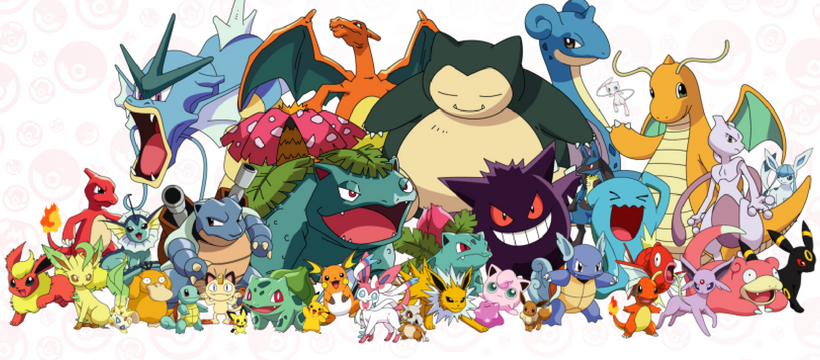

In [1]:
# importing libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 
import re
from scipy import stats 
from scipy.stats import pearsonr
from scipy.stats import zscore

In [2]:
# connecting to pokemon database
con = sqlite3.connect(r"C:\Users\Mohammed\Downloads\pokedex.sqlite")
cur=con.cursor()

In [3]:
# displaying list of tables in DB
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
cur.fetchall()

[('conquest_move_displacements',),
 ('encounter_methods',),
 ('move_targets',),
 ('berry_firmness',),
 ('pokemon_move_methods',),
 ('conquest_warrior_stats',),
 ('item_flags',),
 ('item_fling_effects',),
 ('item_pockets',),
 ('move_damage_classes',),
 ('evolution_triggers',),
 ('contest_effects',),
 ('pokemon_habitats',),
 ('genders',),
 ('super_contest_effects',),
 ('conquest_move_ranges',),
 ('move_meta_categories',),
 ('egg_groups',),
 ('conquest_episodes',),
 ('contest_types',),
 ('move_flags',),
 ('conquest_warrior_archetypes',),
 ('conquest_stats',),
 ('encounter_conditions',),
 ('pokemon_colors',),
 ('move_battle_styles',),
 ('pal_park_areas',),
 ('move_effects',),
 ('regions',),
 ('conquest_move_effects',),
 ('growth_rates',),
 ('languages',),
 ('pokeathlon_stats',),
 ('conquest_warrior_skills',),
 ('pokemon_shapes',),
 ('move_meta_ailments',),
 ('stats',),
 ('conquest_warrior_skill_names',),
 ('conquest_move_displacement_prose',),
 ('pokemon_color_names',),
 ('encounter_condit

### Gen 1 moves :

In [4]:
#You should see an output like this :

moves = """SELECT M.IDENTIFIER, t.name
            FROM moves m
                INNER JOIN
                type_names t ON m.type_id = t.type_id
            WHERE t.local_language_id = 5
            AND
            M.GENERATION_ID = 1;"""
cur.execute(moves)
cur.fetchall()

[('pound', 'Normal'),
 ('karate-chop', 'Combat'),
 ('doubleslap', 'Normal'),
 ('comet-punch', 'Normal'),
 ('mega-punch', 'Normal'),
 ('pay-day', 'Normal'),
 ('fire-punch', 'Feu'),
 ('ice-punch', 'Glace'),
 ('thunderpunch', 'Electrik'),
 ('scratch', 'Normal'),
 ('vicegrip', 'Normal'),
 ('guillotine', 'Normal'),
 ('razor-wind', 'Normal'),
 ('swords-dance', 'Normal'),
 ('cut', 'Normal'),
 ('gust', 'Vol'),
 ('wing-attack', 'Vol'),
 ('whirlwind', 'Normal'),
 ('fly', 'Vol'),
 ('bind', 'Normal'),
 ('slam', 'Normal'),
 ('vine-whip', 'Plante'),
 ('stomp', 'Normal'),
 ('double-kick', 'Combat'),
 ('mega-kick', 'Normal'),
 ('jump-kick', 'Combat'),
 ('rolling-kick', 'Combat'),
 ('sand-attack', 'Sol'),
 ('headbutt', 'Normal'),
 ('horn-attack', 'Normal'),
 ('fury-attack', 'Normal'),
 ('horn-drill', 'Normal'),
 ('tackle', 'Normal'),
 ('body-slam', 'Normal'),
 ('wrap', 'Normal'),
 ('take-down', 'Normal'),
 ('thrash', 'Normal'),
 ('double-edge', 'Normal'),
 ('tail-whip', 'Normal'),
 ('poison-sting', 'Po

### It is hard to write custome queries each time. Lets use the power of Pandas/Python by getting everything into Pandas DF:

In [5]:
#You should see a set of Pandas df like this :
db = {}
cur.execute("SELECT name FROM sqlite_master WHERE  type='table';")

for name in cur.fetchall():
    db[name[0] + '_df']=pd.read_sql_query("SELECT * from {};".format(name[0]),con)
    
for name in db.keys():
    print(name)

conquest_move_displacements_df
encounter_methods_df
move_targets_df
berry_firmness_df
pokemon_move_methods_df
conquest_warrior_stats_df
item_flags_df
item_fling_effects_df
item_pockets_df
move_damage_classes_df
evolution_triggers_df
contest_effects_df
pokemon_habitats_df
genders_df
super_contest_effects_df
conquest_move_ranges_df
move_meta_categories_df
egg_groups_df
conquest_episodes_df
contest_types_df
move_flags_df
conquest_warrior_archetypes_df
conquest_stats_df
encounter_conditions_df
pokemon_colors_df
move_battle_styles_df
pal_park_areas_df
move_effects_df
regions_df
conquest_move_effects_df
growth_rates_df
languages_df
pokeathlon_stats_df
conquest_warrior_skills_df
pokemon_shapes_df
move_meta_ailments_df
stats_df
conquest_warrior_skill_names_df
conquest_move_displacement_prose_df
pokemon_color_names_df
encounter_condition_prose_df
item_fling_effect_prose_df
pokedexes_df
evolution_trigger_prose_df
experience_df
berry_firmness_names_df
move_meta_ailment_names_df
move_effect_prose_

In [6]:
# reading dataframe from pokemon csv file 
df = pd.read_csv('Pokemon.csv',encoding = "utf-8")
df.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [7]:
# replace '#' column with id 
df = df.rename(index=str, columns={"#": "id"})

In [8]:
# convert columns heading itno lower case 
df = df.rename(str.lower, axis='columns')

In [9]:
df.shape

(800, 13)

In [10]:
df.head()

id                   name type 1  type 2  total  hp  attack  defense  \
0   1              Bulbasaur  Grass  Poison    318  45      49       49   
1   2                Ivysaur  Grass  Poison    405  60      62       63   
2   3               Venusaur  Grass  Poison    525  80      82       83   
3   3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4   4             Charmander   Fire     NaN    309  39      52       43   

   sp. atk  sp. def  speed  generation  legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [11]:
# create a new column to display rows that contain duplicates
df["is_null"] = df.duplicated('id',keep=False)

In [12]:
df.head()

id                   name type 1  type 2  total  hp  attack  defense  \
0   1              Bulbasaur  Grass  Poison    318  45      49       49   
1   2                Ivysaur  Grass  Poison    405  60      62       63   
2   3               Venusaur  Grass  Poison    525  80      82       83   
3   3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4   4             Charmander   Fire     NaN    309  39      52       43   

   sp. atk  sp. def  speed  generation  legendary  is_null  
0       65       65     45           1      False    False  
1       80       80     60           1      False    False  
2      100      100     80           1      False     True  
3      122      120     80           1      False     True  
4       60       50     65           1      False    False

In [13]:
# drop duplicates from data frame based on id index 
df.drop_duplicates(subset ="id",inplace = True) 

In [14]:
df.shape

(721, 14)

In [15]:
df.head()

id        name type 1  type 2  total  hp  attack  defense  sp. atk  \
0   1   Bulbasaur  Grass  Poison    318  45      49       49       65   
1   2     Ivysaur  Grass  Poison    405  60      62       63       80   
2   3    Venusaur  Grass  Poison    525  80      82       83      100   
4   4  Charmander   Fire     NaN    309  39      52       43       60   
5   5  Charmeleon   Fire     NaN    405  58      64       58       80   

   sp. def  speed  generation  legendary  is_null  
0       65     45           1      False    False  
1       80     60           1      False    False  
2      100     80           1      False     True  
4       50     65           1      False    False  
5       65     80           1      False    False

In [16]:
# let's check first if there is NaN values. 
df.isnull().values.any()

True

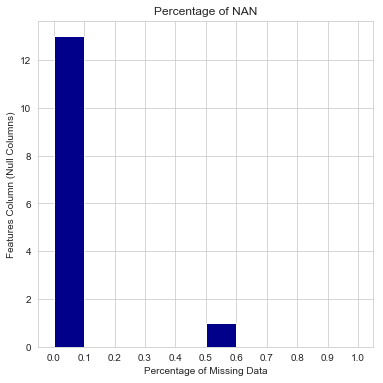

In [17]:
# looks like we have some missing values in the dataset, let us find missing columns and plot them by #plotting the percentage of missing value in each column 
NaN_Percentage = df.isnull().mean().sort_values(ascending=True)
plt.figure(figsize = (6,6))
#percentage from 0 to 1 and number of space lines are 11. 
plt.hist(NaN_Percentage, bins = np.linspace(0, 1, 11),facecolor='darkblue')
plt.xticks(np.linspace(0, 1, 11));
plt.grid(True)
plt.xlabel('Percentage of Missing Data'); 
plt.ylabel('Features Column (Null Columns)'); 
plt.title("Percentage of NAN");

There is only one column that has missing value between 50% to 60%, let us check it out below.

In [18]:
# let's print percentage of NaN values in each column
print(NaN_Percentage)

id            0.000000
name          0.000000
type 1        0.000000
total         0.000000
hp            0.000000
attack        0.000000
defense       0.000000
sp. atk       0.000000
sp. def       0.000000
speed         0.000000
generation    0.000000
legendary     0.000000
is_null       0.000000
type 2        0.514563
dtype: float64


column type 2 is having about more than half of the data are NaN values. We have to fill in the NaN, however, since missing values are more than 50% there is a chance when we imputate, we might some how skew the data. 

In [19]:
# let's look at null values only, in case we can find some inference to use to do imputation
df[df['type 2'].isnull()]

id          name    type 1 type 2  total   hp  attack  defense  sp. atk  \
4      4    Charmander      Fire    NaN    309   39      52       43       60   
5      5    Charmeleon      Fire    NaN    405   58      64       58       80   
9      7      Squirtle     Water    NaN    314   44      48       65       50   
10     8     Wartortle     Water    NaN    405   59      63       80       65   
11     9     Blastoise     Water    NaN    530   79      83      100       85   
13    10      Caterpie       Bug    NaN    195   45      30       35       20   
14    11       Metapod       Bug    NaN    205   50      20       55       25   
24    19       Rattata    Normal    NaN    253   30      56       35       25   
25    20      Raticate    Normal    NaN    413   55      81       60       50   
28    23         Ekans    Poison    NaN    288   35      60       44       40   
29    24         Arbok    Poison    NaN    438   60      85       69       65   
30    25       Pikachu  Electric    NaN    320   35      55       40       50   
31    26        Raichu  Electric    NaN    485   60      90       55       90   
32    27     Sandshrew    Ground    NaN    300   50      75       85       20   
33    28     Sandslash    Ground    NaN    450   75     100      110       45   
34    29      Nidoran♀    Poison    NaN    275   55      47       52       40   
35    30      Nidorina    Poison    NaN    365   70      62       67       55   
37    32      Nidoran♂    Poison    NaN    273   46      57       40       40   
38    33      Nidorino    Poison    NaN    365   61      72       57       55   
40    35      Clefairy     Fairy    NaN    323   70      45       48       60   
41    36      Clefable     Fairy    NaN    483   95      70       73       95   
42    37        Vulpix      Fire    NaN    299   38      41       40       50   
43    38     Ninetales      Fire    NaN    505   73      76       75       81   
55    50       Diglett    Ground    NaN    265   10      55       25       35   
56    51       Dugtrio    Ground    NaN    405   35      80       50       50   
57    52        Meowth    Normal    NaN    290   40      45       35       40   
58    53       Persian    Normal    NaN    440   65      70       60       65   
59    54       Psyduck     Water    NaN    320   50      52       48       65   
60    55       Golduck     Water    NaN    500   80      82       78       95   
61    56        Mankey  Fighting    NaN    305   40      80       35       35   
..   ...           ...       ...    ...    ...  ...     ...      ...      ...   
719  651     Quilladin     Grass    NaN    405   61      78       95       56   
721  653      Fennekin      Fire    NaN    307   40      45       40       62   
722  654       Braixen      Fire    NaN    409   59      59       58       90   
724  656       Froakie     Water    NaN    314   41      56       40       62   
725  657     Frogadier     Water    NaN    405   54      63       52       83   
727  659      Bunnelby    Normal    NaN    237   38      36       38       32   
732  664    Scatterbug       Bug    NaN    200   38      35       40       27   
733  665        Spewpa       Bug    NaN    213   45      22       60       27   
737  669       Flabébé     Fairy    NaN    303   44      38       39       61   
738  670       Floette     Fairy    NaN    371   54      45       47       75   
739  671       Florges     Fairy    NaN    552   78      65       68      112   
740  672        Skiddo     Grass    NaN    350   66      65       48       62   
741  673        Gogoat     Grass    NaN    531  123     100       62       97   
742  674       Pancham  Fighting    NaN    348   67      82       62       46   
744  676       Furfrou    Normal    NaN    472   75      80       60       65   
745  677        Espurr   Psychic    NaN    355   62      48       54       63   
746  678  MeowsticMale   Psychic    NaN    466   74      48       76       83   
752  682      Spritzee     Fairy    N

There is no trend is seen to do imputation. so type2 can be imputate with "None" as it does not belong to it. In another words, if there is None in type2, it means it belongs to type 1.  

In [20]:
# fillin NaN with None in type2 column
df['type 2'].fillna('None', inplace =True)

In [21]:
# let's check again if there is NaN values missed. 
df.isnull().values.any()

False

### Seperating dataset
The dataset contains both information regarding the identity and statistics of each Pokemon species; therefore, 
let's separate these two observational units into separate tables: pokedex and statistics.

### Pokemon identity unit

In [22]:
# create a list of columns from main dataset to append them to new data frames
id_list = [col for col in df['id']]
name_list = [col for col in df['name']]
type1_list = [col for col in df['type 1']]
type2_list = [col for col in df['type 2']]
generation_list = [col for col in df['generation']]
legendary_list = [col for col in df['legendary']]

In [23]:
# create a new data frame named pokedex
pokedex = pd.DataFrame(data = {"id":id_list,"name":name_list,"type 1":type1_list,"type 2":type2_list,"generation":generation_list,
                              "legendary":legendary_list})
pokedex.head()

id        name type 1  type 2  generation  legendary
0   1   Bulbasaur  Grass  Poison           1      False
1   2     Ivysaur  Grass  Poison           1      False
2   3    Venusaur  Grass  Poison           1      False
3   4  Charmander   Fire    None           1      False
4   5  Charmeleon   Fire    None           1      False

### Pokemon statistics unit

In [24]:
# create a list of columns to append them to new data frames
hp_list = [col for col in df['hp']]
attack_list = [col for col in df['attack']]
defense_list = [col for col in df['defense']]
spatk_list = [col for col in df['sp. atk']]
spdef_list = [col for col in df['sp. def']]
speed_list = [col for col in df['speed']]
total_list = [col for col in df['total']]

In [25]:
# create a new data frame named poke_statistics
poke_statistics = pd.DataFrame(data = {"id":id_list,"hp":hp_list,"attack":attack_list,"defense":defense_list,"sp. atk":spatk_list,"sp. def":spdef_list,
                              "speed":speed_list,"total":total_list})
poke_statistics.head()

id  hp  attack  defense  sp. atk  sp. def  speed  total
0   1  45      49       49       65       65     45    318
1   2  60      62       63       80       80     60    405
2   3  80      82       83      100      100     80    525
3   4  39      52       43       60       50     65    309
4   5  58      64       58       80       65     80    405

In [26]:
# disply statistics summary of pokemon abilities
poke_statistics.describe()

id          hp      attack     defense     sp. atk     sp. def  \
count  721.00000  721.000000  721.000000  721.000000  721.000000  721.000000   
mean   361.00000   68.380028   75.124827   70.697642   68.848821   69.180305   
std    208.27906   25.848272   29.070335   29.194941   28.898590   26.899364   
min      1.00000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    181.00000   50.000000   54.000000   50.000000   45.000000   50.000000   
50%    361.00000   65.000000   75.000000   65.000000   65.000000   65.000000   
75%    541.00000   80.000000   95.000000   85.000000   90.000000   85.000000   
max    721.00000  255.000000  165.000000  230.000000  154.000000  230.000000   

            speed       total  
count  721.000000  721.000000  
mean    65.714286  417.945908  
std     27.277920  109.663671  
min      5.000000  180.000000  
25%     45.000000  320.000000  
50%     65.000000  424.000000  
75%     85.000000  499.000000  
max    160.000000  720.000000

### Now we have a clean dataset. 
### Lets see : How are Pokemon numbers distributed across generations?

In [27]:
# display statistics describtion for each type of generation
pokedex.groupby(["generation"])["id"].describe()

count   mean        std    min     25%    50%     75%    max
generation                                                              
1           151.0   76.0  43.734045    1.0   38.50   76.0  113.50  151.0
2           100.0  201.5  29.011492  152.0  176.75  201.5  226.25  251.0
3           135.0  319.0  39.115214  252.0  285.50  319.0  352.50  386.0
4           107.0  440.0  31.032241  387.0  413.50  440.0  466.50  493.0
5           156.0  571.5  45.177428  494.0  532.75  571.5  610.25  649.0
6            72.0  685.5  20.928450  650.0  667.75  685.5  703.25  721.0

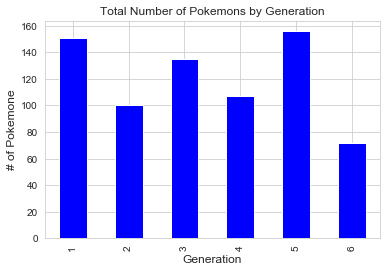

In [28]:
# plotting number of pokemons for each generation 
pokedex.groupby(["generation"])['generation'].count().plot.bar(color = 'blue')
plt.title("Total Number of Pokemons by Generation", fontsize=12)
plt.xlabel("Generation", fontsize=12)
plt.ylabel("# of Pokemone", fontsize=12);

# or by 
#pd.value_counts(pokedex['generation']).plot.bar()
#plt.show()

In [29]:
print(pokedex.groupby(["generation"])['generation'].count().sort_values(ascending=False))

generation
5    156
1    151
3    135
4    107
2    100
6     72
Name: generation, dtype: int64


### Try Seaboarn:

C:\Users\Mohammed\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


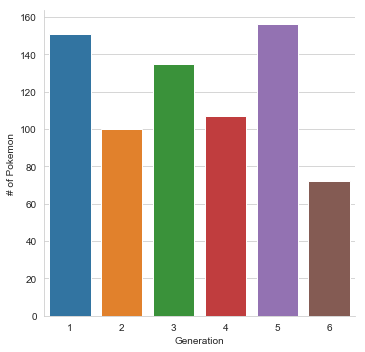

In [30]:
sns.factorplot(kind='count', data=pokedex, x='generation').set_axis_labels("Generation", "# of Pokemon");

#### There doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations.

## Distribuations of Primary Types of Pokemon

Let's dig a bit deeper and examine the distribution of primary types of Pokemon across generations.

C:\Users\Mohammed\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


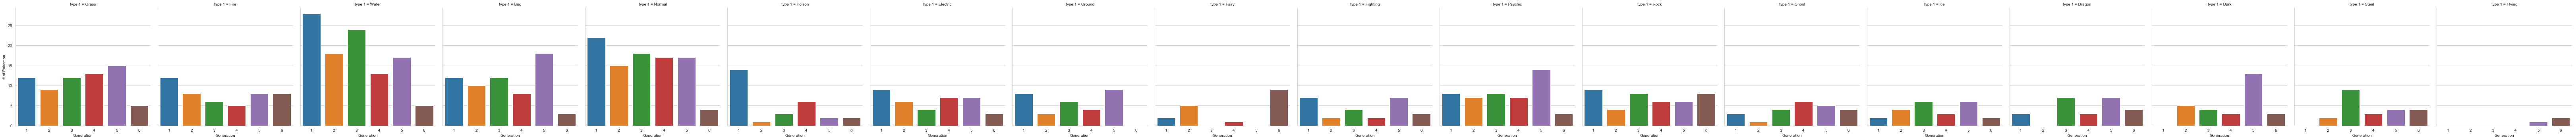

In [31]:
sns.factorplot(kind='count', 
              data=pokedex, 
              col='type 1',
              x='generation').set_axis_labels("Generation", "# of Pokemon");

C:\Users\Mohammed\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


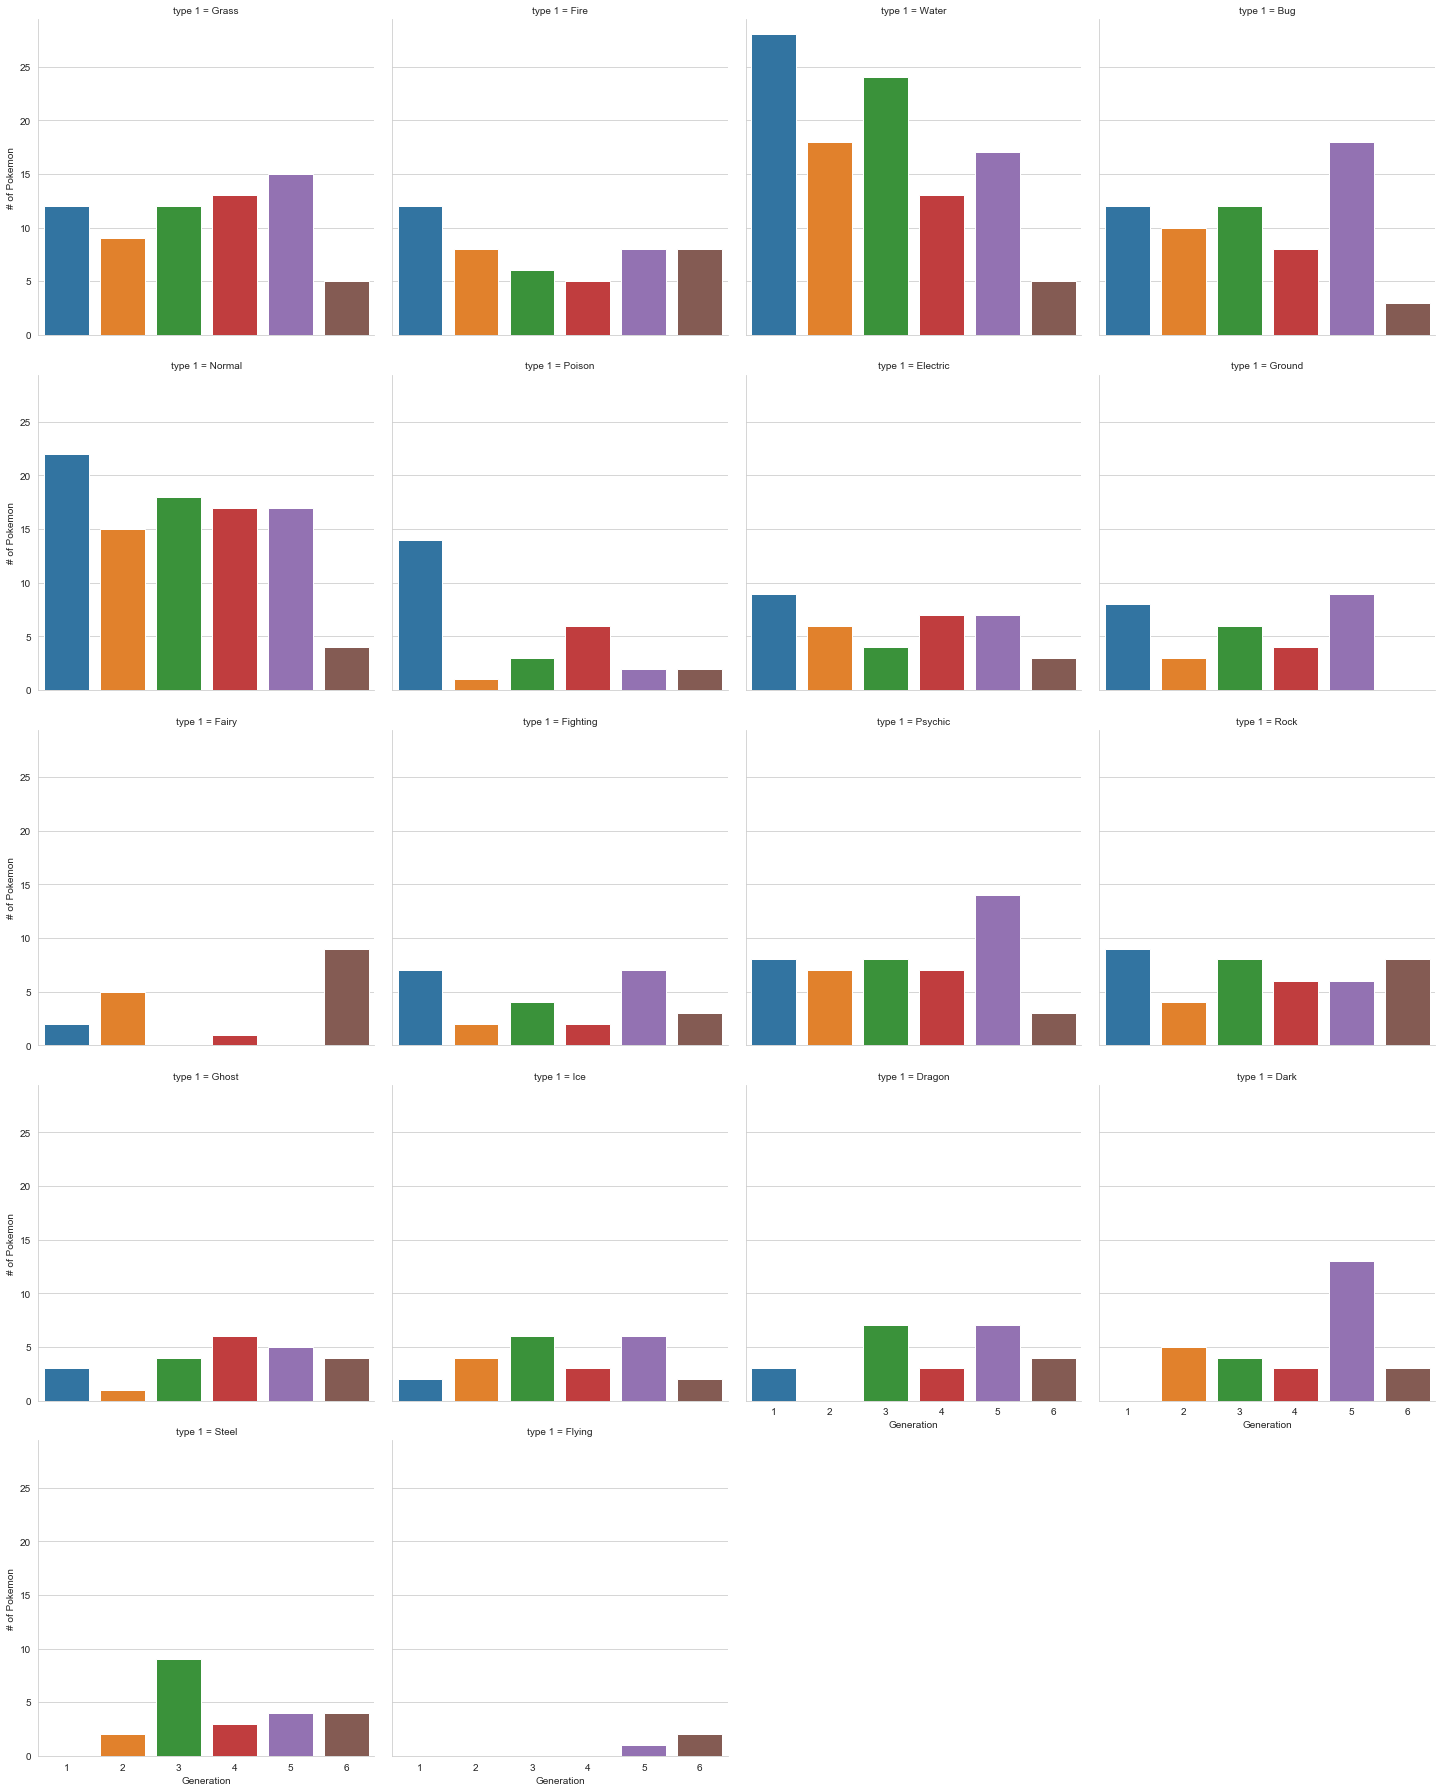

In [32]:
sns.factorplot(kind='count', 
              data=pokedex, 
              col='type 1',
              x='generation',col_wrap=4).set_axis_labels("Generation", "# of Pokemon");


In [33]:
# let display some numbers for each type in all the generations to come up with a solid conclusion
print(pokedex.groupby(["type 1"])['generation'].count().sort_values(ascending=False))

type 1
Water       105
Normal       93
Grass        66
Bug          63
Psychic      47
Fire         47
Rock         41
Electric     36
Ground       30
Poison       28
Dark         28
Fighting     25
Dragon       24
Ice          23
Ghost        23
Steel        22
Fairy        17
Flying        3
Name: generation, dtype: int64


**Observations:** 

1. The primary distrbution of for different type is actually random, there is no specific trend seen. The reason behind this is that different generation affects the type distribution in primary species.
2. The only noticable trend is that odd number generations always have more pokemons than even number generations. 
3. Amonge all primary distribution, water type pokemon has the highest number of pokemons in the datasets. 
4. Water type pokemons of generation 1 and 3 are the most populated in water species. 
5. Normal type pokemons have high population relative to others, specifically in generation 1 and 2. 
6. Among all type 1 species, generation 5 has the highest number of species as it can be seen from the bar plots. 
7. Flying species have the lowest number of population in all generations, it only has species from generation 5 & 6 only, looks like they are new species added to pokemon generations. 

### Are there unique primary or secondary Pokemon types, or if they simply share the same ones.

In [34]:
unique_type1 =  np.setdiff1d(pokedex['type 1'], pokedex['type 2'])
unique_type1

array([], dtype=object)

In [35]:
unique_type2 =  np.setdiff1d(pokedex['type 2'], pokedex['type 1'])
unique_type2

array(['None'], dtype=object)

unfortunately, there are no unique primary or secondary pokemon type. 

In [36]:
# Get The total number of primary and secondary types:
t1 =len(np.unique(pokedex['type 1'],return_counts= False))
t1 = str(t1)
t2 =len(np.unique(pokedex['type 2'],return_counts= False))
t2 = str(t2)
print("# of Type1 Pokemon:" + t1)

print("# of Type2 Pokemon:" + t2)

# of Type1 Pokemon:18
# of Type2 Pokemon:19


### What are the most common types of Pokemon?

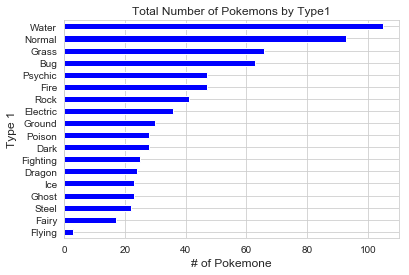

In [37]:
# Make a plot of the distribution of the Type 1 Pokemon.  
pokedex.groupby(["type 1"])['type 1'].count().sort_values(ascending=True).plot.barh(color='blue')
plt.title("Total Number of Pokemons by Type1", fontsize=12)
plt.xlabel("# of Pokemone", fontsize=12)
plt.ylabel("Type 1", fontsize=12);

C:\Users\Mohammed\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Mohammed\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


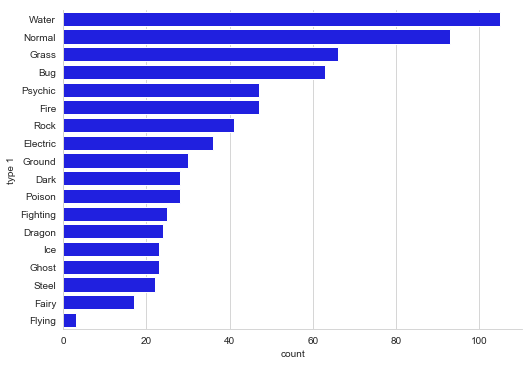

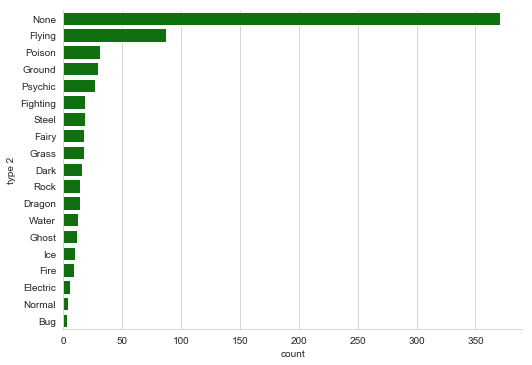

In [38]:
# Now try Seaborn:
sns.factorplot(data=pokedex,
               y='type 1',
                kind='count',
                 order = pokedex['type 1'].value_counts().index,
                 color='blue',
                     aspect=1.5)

sns.factorplot(data=pokedex,
               y='type 2',
                kind='count',
                 order = pokedex['type 2'].value_counts().index,
                 color='green',
                     aspect=1.5);

**Observations:** 
1. The most common type of pokemon is the Water type. It has the highest record in primary species. Grass and Normal type are the second and third highest records respectively. 
2. Since we placed None for those in secondary type2 column, it shows that almost more than half of all the pokemons do not have secondary type. 
3. An interesting observation about flying species. In secondary type, flying pokemons are the most common ones while it is the least common in primary species. 

### But we can not say which type maps into which type !

Lets create a heatmap !

In [39]:
# Create a new df called "dual_types" by getting rid of the records for which we do not have Type 2
# remove None from dataframe
dual_types = pokedex[~pokedex['type 2'].str.contains("None")]

In [40]:
# display data frame after removing None
dual_types.head()

id        name type 1  type 2  generation  legendary
0    1   Bulbasaur  Grass  Poison           1      False
1    2     Ivysaur  Grass  Poison           1      False
2    3    Venusaur  Grass  Poison           1      False
5    6   Charizard   Fire  Flying           1      False
11  12  Butterfree    Bug  Flying           1      False

In [41]:
hemap_df = dual_types.groupby(['type 1','type 2']).size().unstack()

In [42]:
hemap_df.shape

(18, 18)

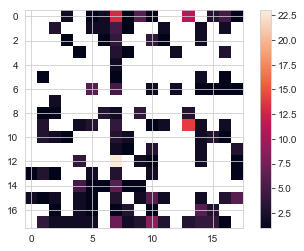

In [43]:
#displaying matplotlib imshow 
color_map = plt.imshow(hemap_df)
plt.colorbar();

imshow plot looks glory and not nice, we will try different plot.

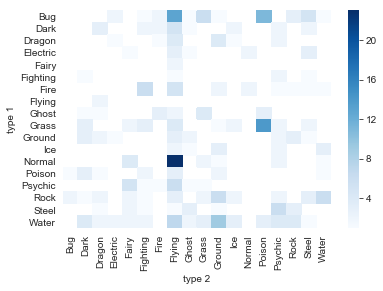

In [44]:
# displaying pokemon combination heat map with seaborn library
sns.heatmap(hemap_df,cmap = "Blues");

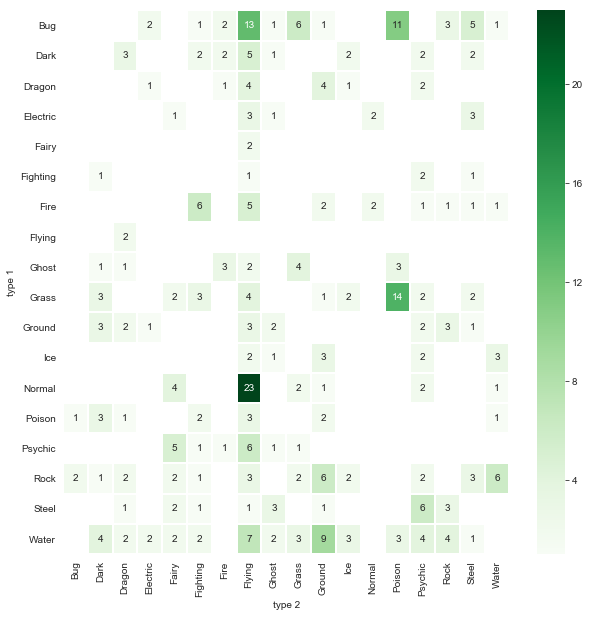

In [45]:
# refine heat map to get clear score
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(hemap_df,annot=True,ax=ax,linewidths=1,cmap = "Greens");
plt.show()

**Observation:** 
From the heat map, the top four combinations of pokemon are the following: 

1. Normal & Flying combination has a score of 26. 
2. Grass & Poison combination has a score of 14. 
3. Bug & Flying combination has a score of 13. 
4. Bug & Posion combination has a score of 11. 

### Are any of the statistics correlated?

In [46]:
# It is a very natural question to ask.
# plot differernt combinations of quantities and see if you can see any correlation. Something like this:
poke_statistics.head(10)

id  hp  attack  defense  sp. atk  sp. def  speed  total
0   1  45      49       49       65       65     45    318
1   2  60      62       63       80       80     60    405
2   3  80      82       83      100      100     80    525
3   4  39      52       43       60       50     65    309
4   5  58      64       58       80       65     80    405
5   6  78      84       78      109       85    100    534
6   7  44      48       65       50       64     43    314
7   8  59      63       80       65       80     58    405
8   9  79      83      100       85      105     78    530
9  10  45      30       35       20       20     45    195

<Figure size 432x288 with 0 Axes>

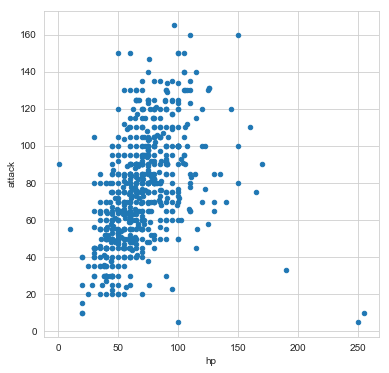

<Figure size 432x288 with 0 Axes>

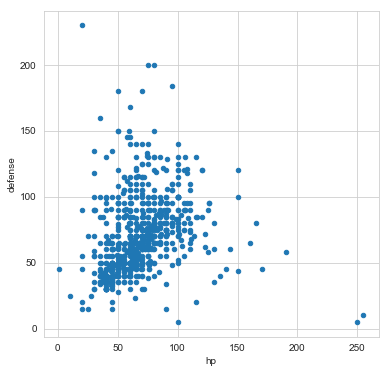

<Figure size 432x288 with 0 Axes>

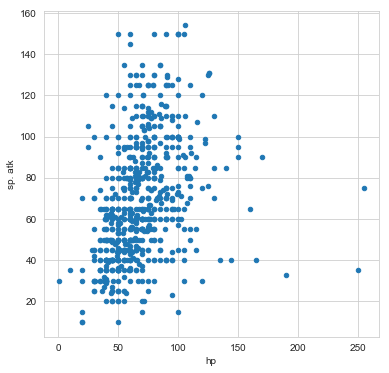

<Figure size 432x288 with 0 Axes>

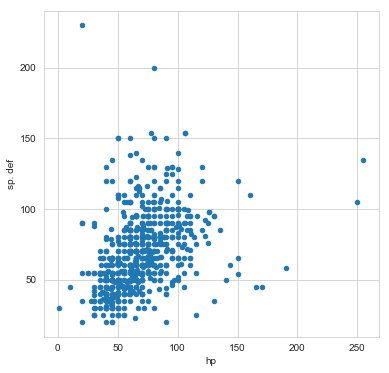

<Figure size 432x288 with 0 Axes>

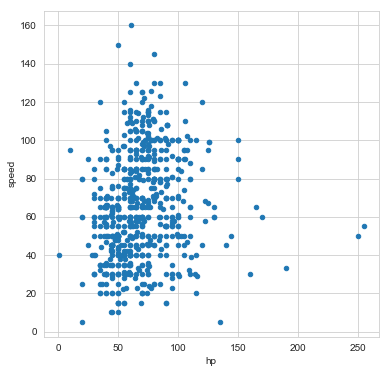

<Figure size 432x288 with 0 Axes>

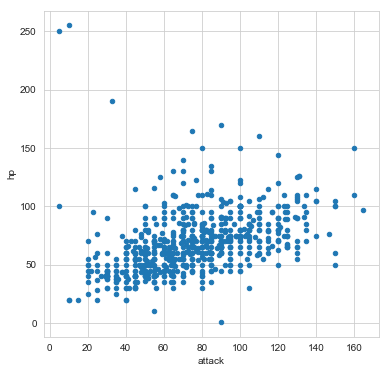

<Figure size 432x288 with 0 Axes>

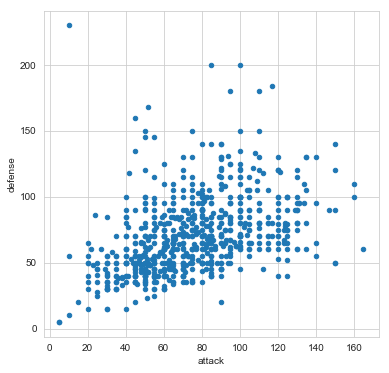

<Figure size 432x288 with 0 Axes>

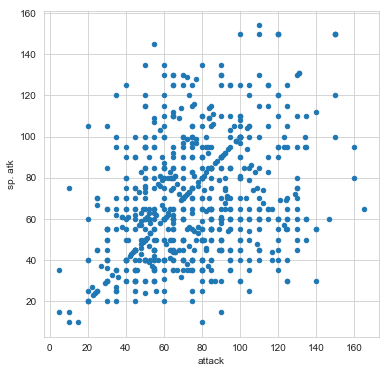

<Figure size 432x288 with 0 Axes>

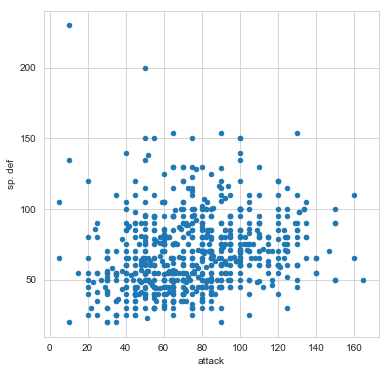

<Figure size 432x288 with 0 Axes>

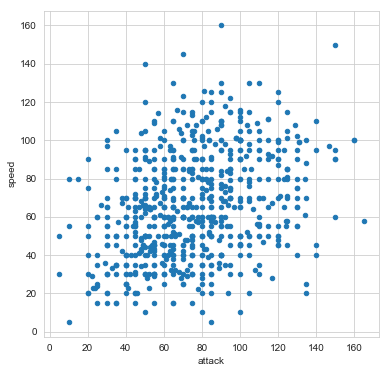

<Figure size 432x288 with 0 Axes>

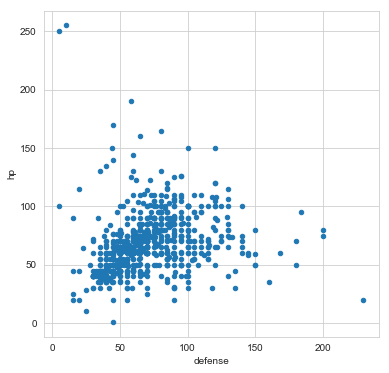

<Figure size 432x288 with 0 Axes>

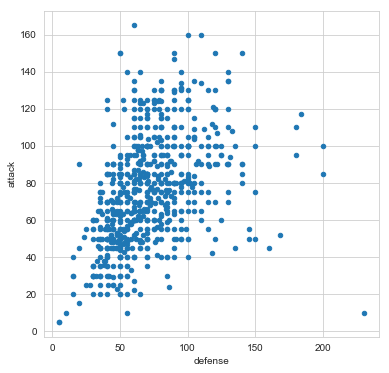

<Figure size 432x288 with 0 Axes>

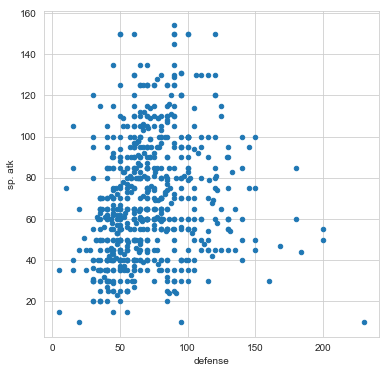

<Figure size 432x288 with 0 Axes>

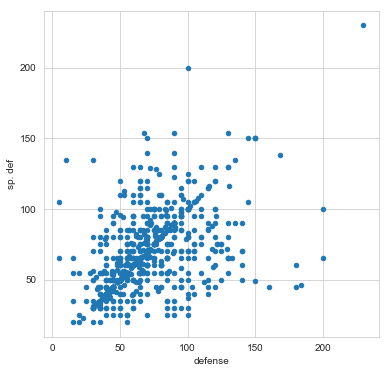

<Figure size 432x288 with 0 Axes>

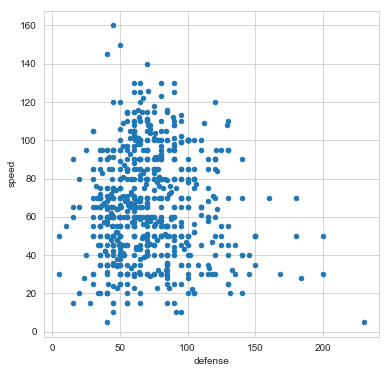

<Figure size 432x288 with 0 Axes>

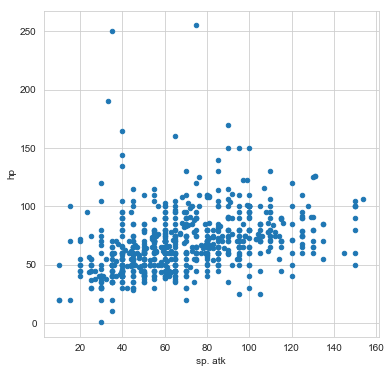

<Figure size 432x288 with 0 Axes>

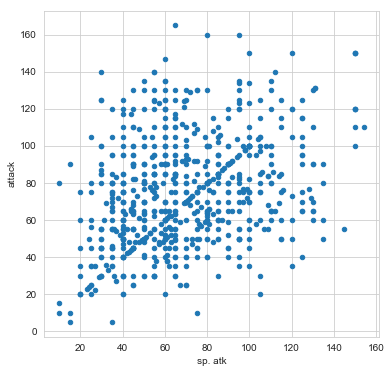

<Figure size 432x288 with 0 Axes>

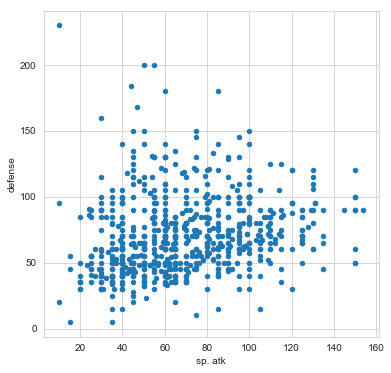

<Figure size 432x288 with 0 Axes>

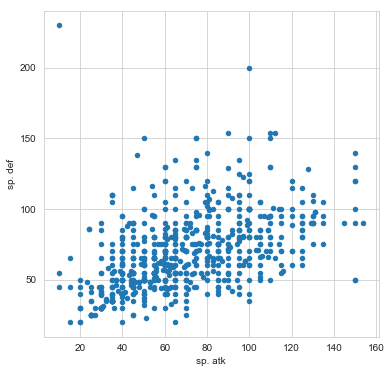

<Figure size 432x288 with 0 Axes>

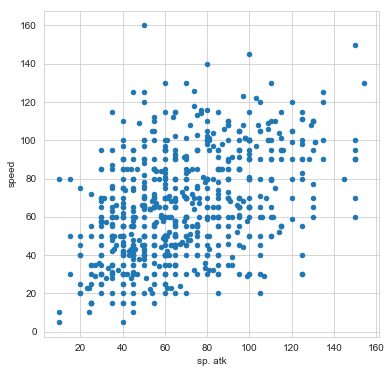

<Figure size 432x288 with 0 Axes>

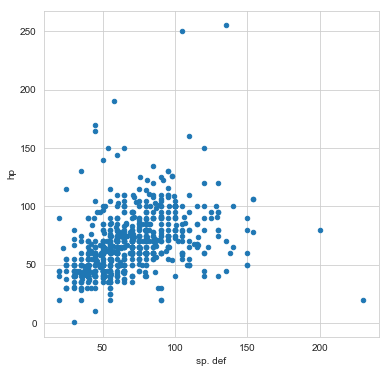

<Figure size 432x288 with 0 Axes>

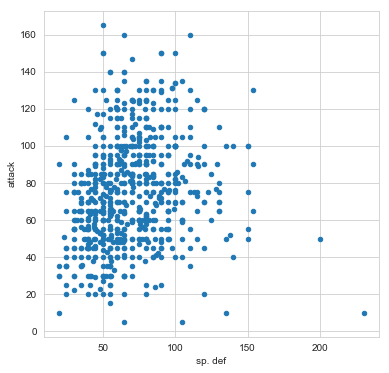

<Figure size 432x288 with 0 Axes>

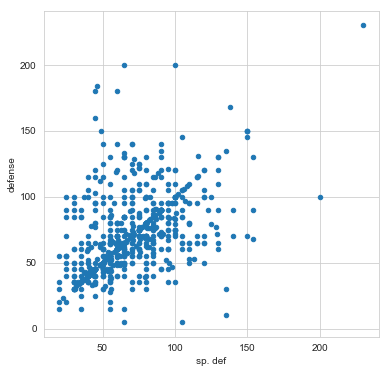

<Figure size 432x288 with 0 Axes>

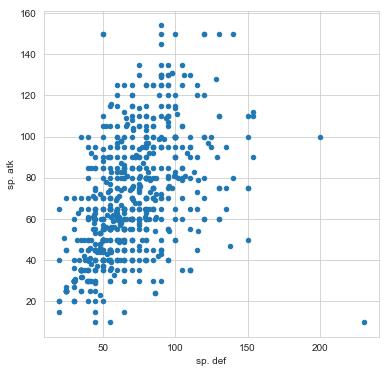

<Figure size 432x288 with 0 Axes>

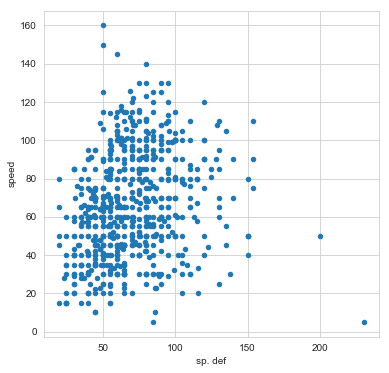

<Figure size 432x288 with 0 Axes>

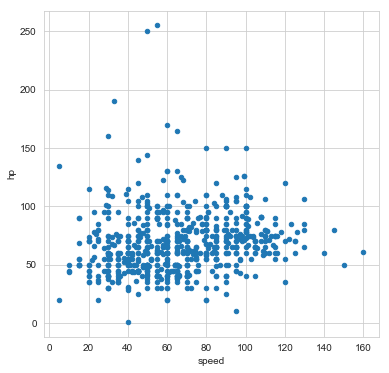

<Figure size 432x288 with 0 Axes>

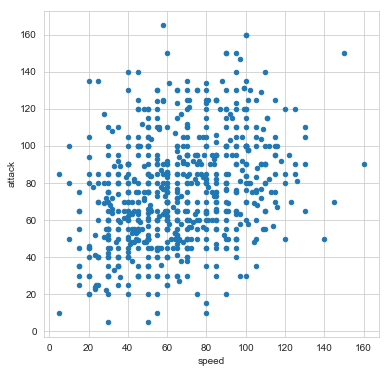

<Figure size 432x288 with 0 Axes>

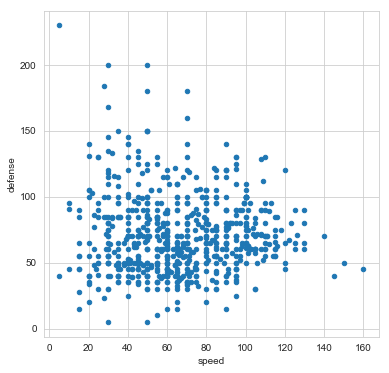

<Figure size 432x288 with 0 Axes>

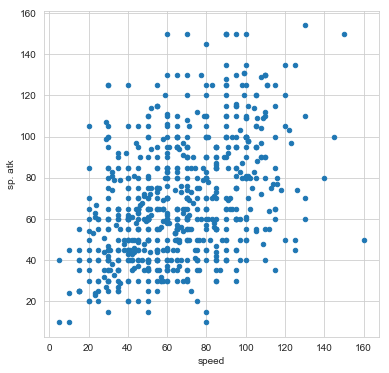

<Figure size 432x288 with 0 Axes>

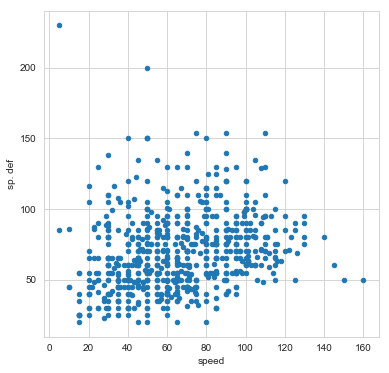

In [47]:
# create a loop to plot all the scatter plot sp.atk against various other abilities
k = [0,1,2,3,4,5]
x4 = ['hp','attack','defense','sp. atk','sp. def','speed']
y4 = ['hp','attack','defense','sp. atk','sp. def','speed']
for i in k:
    for j in k:
        if j != i:
            plt.figure()
            poke_statistics.plot.scatter(x= x4[i],y=y4[j],figsize=(6, 6))
            plt.show()   

In [48]:
# Loop over all combinations and output the correlation coefficients. Then sort based on the coefficients
columns = list(poke_statistics)
pc_coefs = []
cor_coef_r = []
for i in columns:
    for j in columns: 
        if j!=i: 
            pc_coefs.append(stats.pearsonr(poke_statistics[i],poke_statistics[j]))

for m in range(len(pc_coefs)): 
    cor_coef_r.append(pc_coefs[m][0])

In [49]:
print(cor_coef_r)

[0.10751217677322124, 0.14445885485142806, 0.11509032928001395, 0.12650348628839375, 0.10499786536651357, 0.02815610884450714, 0.16036956266580485, 0.10751217677322124, 0.4258389897628539, 0.23417725028263225, 0.36263574342561183, 0.38256872781199935, 0.17003077974523076, 0.6426280244799402, 0.14445885485142806, 0.4258389897628539, 0.4340218261332669, 0.33969936758078595, 0.20832222041378745, 0.3321719706628052, 0.7042469640111944, 0.11509032928001395, 0.23417725028263225, 0.4340218261332669, 0.2021883061127319, 0.4799909288960093, -0.0068492205632582105, 0.6057863342638177, 0.12650348628839375, 0.36263574342561183, 0.33969936758078595, 0.2021883061127319, 0.4930378568268582, 0.4395480740976364, 0.7231429403743894, 0.10499786536651357, 0.38256872781199935, 0.20832222041378745, 0.4799909288960093, 0.4930378568268582, 0.23649945471051, 0.7072234536413495, 0.02815610884450714, 0.17003077974523076, 0.3321719706628052, -0.0068492205632582105, 0.4395480740976364, 0.23649945471051, 0.54889020

C:\Users\Mohammed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


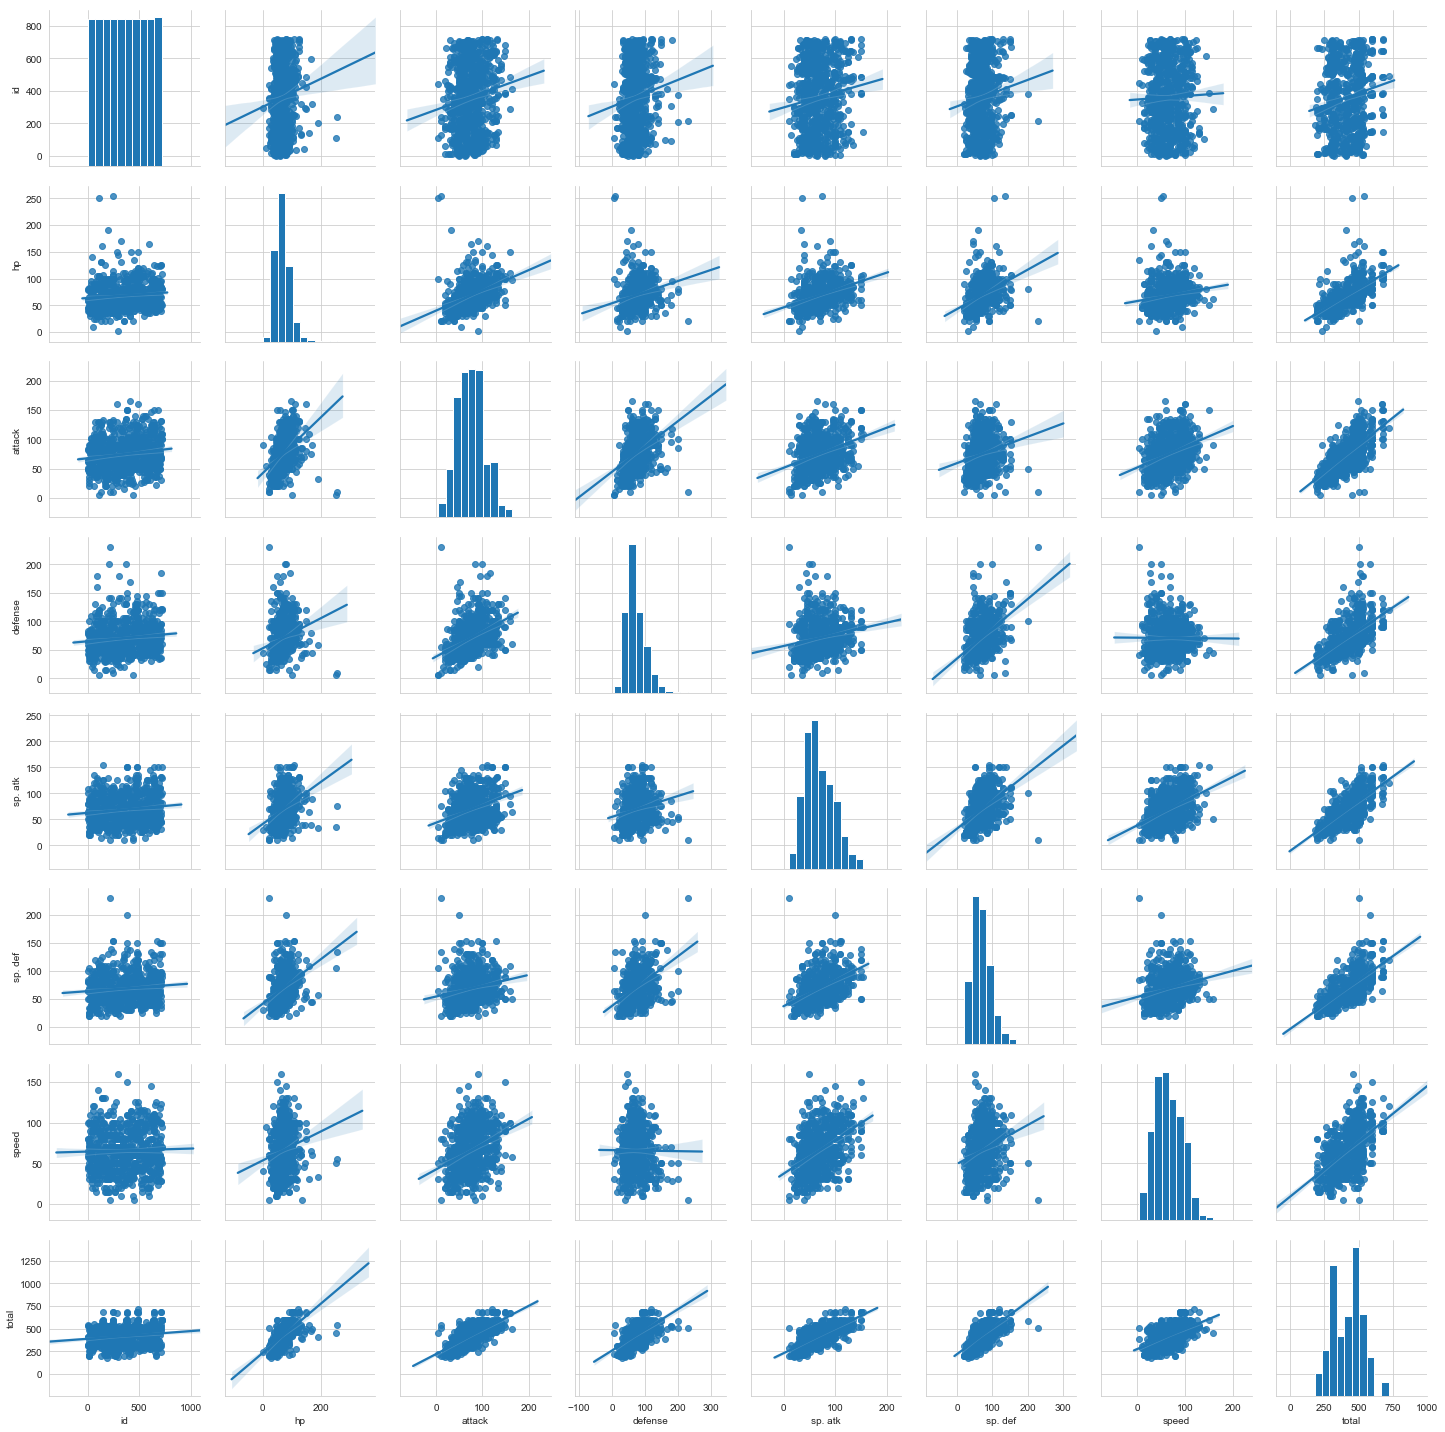

In [50]:
# displaying pairplot for statistics abilities including id 
sns.pairplot(poke_statistics, kind="reg")
plt.show();

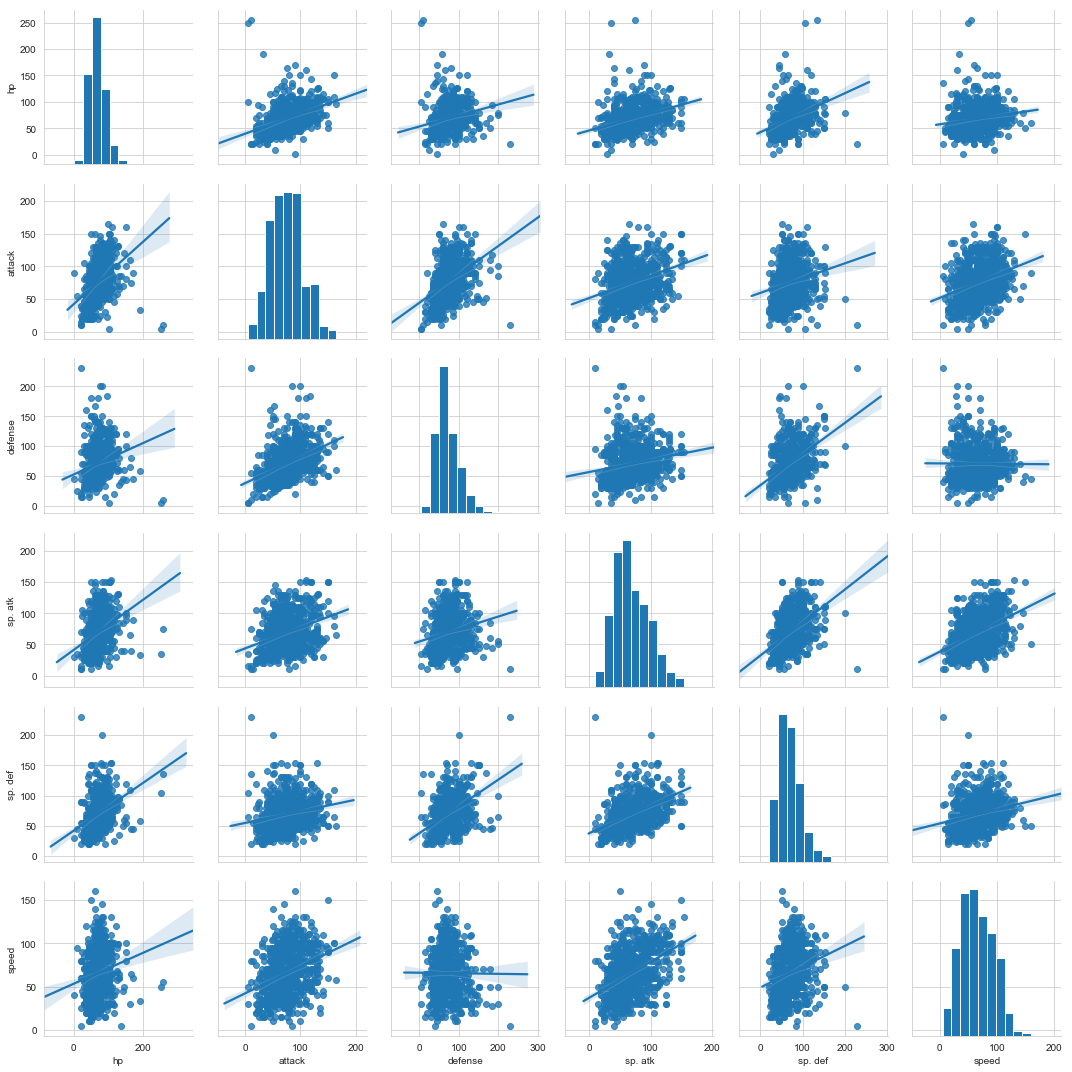

In [51]:
# displaying pairplot for statistics abilities only
sns.pairplot(poke_statistics.iloc[:,1:7], kind="reg")
plt.show();

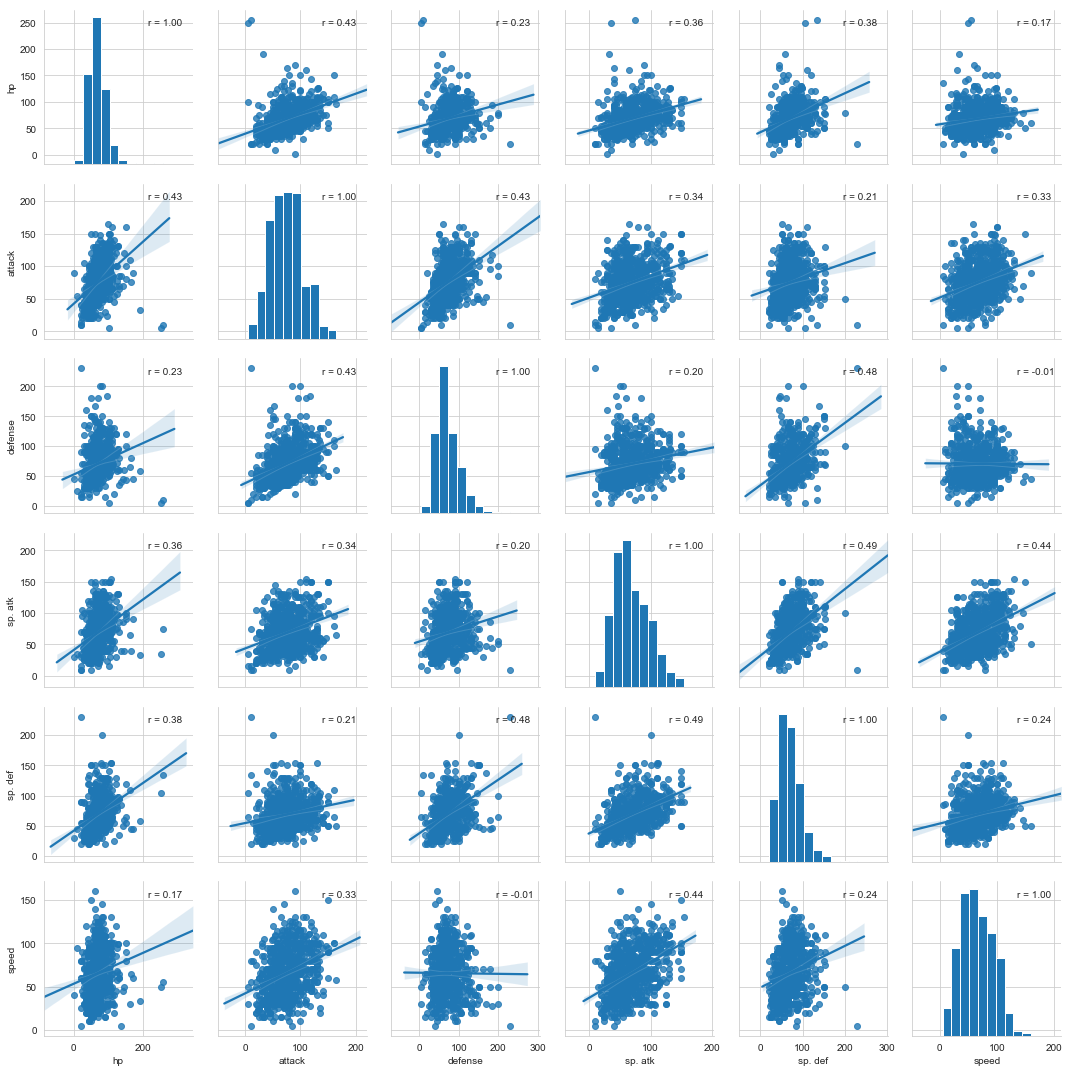

In [52]:
# defining a function to display the corrleation coefficient in the pairplot 
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.7, .9), xycoords=ax.transAxes)
graph = sns.pairplot(poke_statistics.iloc[:,1:7], kind="reg")
graph.map(corrfunc)
plt.show();

**Observations:** 
The pairplot will show how some abilities are related based on correlation coefficient. This could help us to identify pokemons with some combinations. For this analysis, I will select combinations with high correlation coefficients. 

1. sp.atk and sp.def abilities have a correlation coefficient  of 0.49. 
2. sp.def and defense abilities have a corrleation coefficient of  0.48. 
3. speed and sp.atk abilities have a correlation coefficient of 0.44. 
4. defense and attack abilities have a correlation coefficient of 0.43. 
5. attack and hp abilites have a correlation coefficient of 0.43. 
6. hp and sp.def abilites have a correlation coefficient of 0.38. 


Knowing above corrleation coefficients give us insight about abilities statistics disturbuation amonge pokemons. At the end of this project, the above pairplot is summaized in heat map showing correlation matrix. 

### What are the strongest and weakest Pokemon species?

### Strongest and Weakness pokemon species by using total value as index

In [53]:
# displaying the strongest pokemon by using the index of the maximum value in total column
df.loc[[df['total'].idxmax()]]

id    name  type 1 type 2  total   hp  attack  defense  sp. atk  \
552  493  Arceus  Normal   None    720  120     120      120      120   

     sp. def  speed  generation  legendary  is_null  
552      120    120           4       True    False

In [54]:
# displaying the weakness pokemon by using the index of the minmum value in total column
df.loc[[df['total'].idxmin()]]

id     name type 1 type 2  total  hp  attack  defense  sp. atk  sp. def  \
206  191  Sunkern  Grass   None    180  30      30       30       30       30   

     speed  generation  legendary  is_null  
206     30           2      False    False

**Observations:** 

1. The strongest pokemon based on total value is Arceus type 1 Normal 

 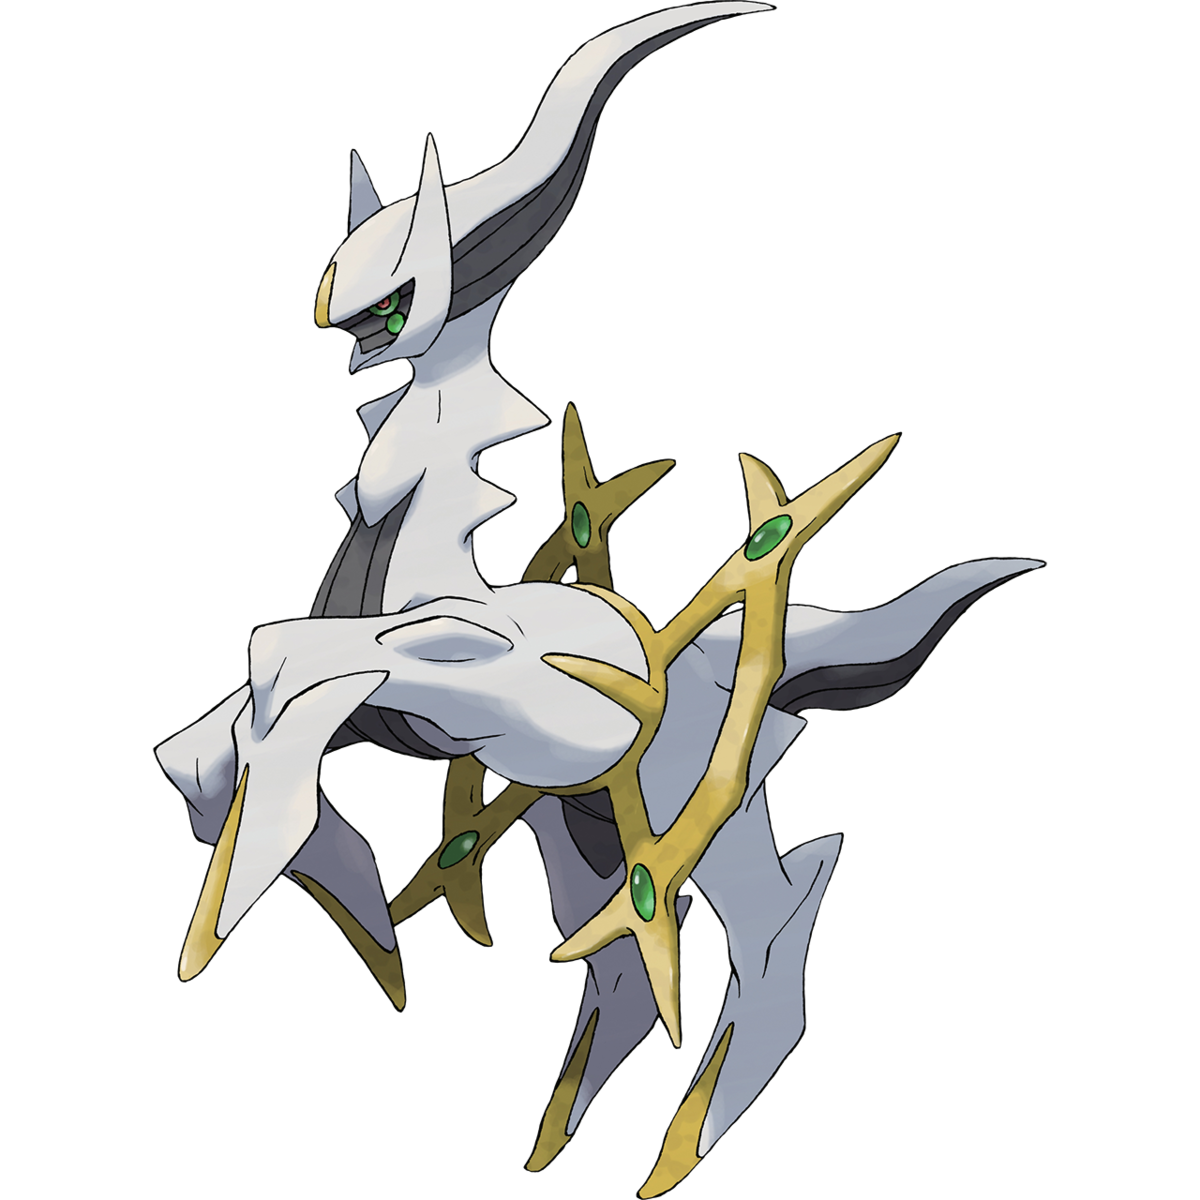

2. The weakest pokemon based on total value is Sunkern type 1 Grass

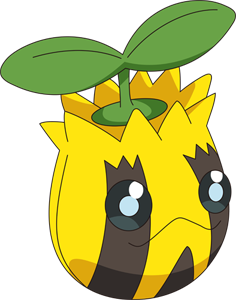

#### We can not take the total sum of abilities to make conclusion about strongest and weakest pokemon species. The total sum gives you the strongest and weakest pokemon as indivdual not as a species or as a type. Moreover, we have to account for the variation in each statisitics by standrized the statistis with mean and standard deviation across all pokemon. 

In [55]:
# create a copy from main df for the purpose of calculating z score
z_scores_df = df.copy()

In [56]:
# dropping unnecessary columns for the zscore 
z_scores_df.drop(['id','name','type 1','type 2','total','generation','legendary','is_null'],axis =1, inplace = True)
z_scores_df.head()

hp  attack  defense  sp. atk  sp. def  speed
0  45      49       49       65       65     45
1  60      62       63       80       80     60
2  80      82       83      100      100     80
4  39      52       43       60       50     65
5  58      64       58       80       65     80

In [57]:
# I create this copy for the last question in this project. I will plot a heat map instead of pairplot. I will use it later.
corr_summary = z_scores_df.copy()

In [58]:
# get the z score
z_scores_df = z_scores_df.apply(zscore)

In [59]:
# create a new column named strength and add all abitlites in this column 
z_scores_df['strength'] = z_scores_df.sum(axis = 1, skipna = True) 

In [60]:
# display z score data frame
z_scores_df.head()

hp    attack   defense   sp. atk   sp. def     speed  strength
0 -0.905138 -0.899300 -0.743715 -0.133276 -0.155513 -0.759906 -3.596849
1 -0.324426 -0.451799 -0.263847  0.386141  0.402508 -0.209629 -0.461052
2  0.449857  0.236666  0.421679  1.078696  1.146536  0.524073  3.857508
4 -1.137423 -0.796031 -0.949372 -0.306415 -0.713534 -0.026204 -3.928979
5 -0.401854 -0.382952 -0.435228  0.386141 -0.155513  0.524073 -0.465334

In [61]:
# add name, type1 and type2 columns into the z score data frame for the purpose of heat map visualization
z_scores_df =z_scores_df.assign(name=df['name'].values, type_1 = df['type 1'].values, type_2 = df['type 2'].values )

In [62]:
z_scores_df.head()

hp    attack   defense   sp. atk   sp. def     speed  strength  \
0 -0.905138 -0.899300 -0.743715 -0.133276 -0.155513 -0.759906 -3.596849   
1 -0.324426 -0.451799 -0.263847  0.386141  0.402508 -0.209629 -0.461052   
2  0.449857  0.236666  0.421679  1.078696  1.146536  0.524073  3.857508   
4 -1.137423 -0.796031 -0.949372 -0.306415 -0.713534 -0.026204 -3.928979   
5 -0.401854 -0.382952 -0.435228  0.386141 -0.155513  0.524073 -0.465334   

         name type_1  type_2  
0   Bulbasaur  Grass  Poison  
1     Ivysaur  Grass  Poison  
2    Venusaur  Grass  Poison  
4  Charmander   Fire    None  
5  Charmeleon   Fire    None

In [63]:
# create new data frame for strenth distribution heat map between type1 and type2
z_scores_df_all = z_scores_df[['name','type_1','type_2','strength']]

In [64]:
# create new data frame for hp distribution heat map between type1 and type2
z_scores_df_hp = z_scores_df[['name','type_1','type_2','hp']]

In [65]:
# create new data frame for attack distribution heat map between type1 and type2
z_scores_df_attack = z_scores_df[['name','type_1','type_2','attack']]

In [66]:
# create new data frame for defense distribution heat map between type1 and type2
z_scores_df_defense = z_scores_df[['name','type_1','type_2','defense']]

In [67]:
# create new data frame for sp. atk distribution heat map between type1 and type2
z_scores_df_spatk = z_scores_df[['name','type_1','type_2','sp. atk']]

In [68]:
# create new data frame for sp. def distribution heat map between type1 and type2
z_scores_df_spdef = z_scores_df[['name','type_1','type_2','sp. def']]

In [69]:
# create new data frame for speed distribution heat map between type1 and type2
z_scores_df_speed = z_scores_df[['name','type_1','type_2','speed']]

In [70]:
# group by all abilites take mean to standariztion of variation and unstack values for each data frame 
z_all = z_scores_df_all.groupby(["type_1","type_2"])["strength"].mean().unstack()
z_all = z_all.round(2)

z_hp = z_scores_df_hp.groupby(["type_1","type_2"])["hp"].mean().unstack()
z_hp = z_hp.round(2)

z_attack = z_scores_df_attack.groupby(["type_1","type_2"])["attack"].mean().unstack()
z_attack = z_attack.round(2)

z_defense = z_scores_df_defense.groupby(["type_1","type_2"])["defense"].mean().unstack()
z_defense = z_defense.round(2)

z_spatk = z_scores_df_spatk.groupby(["type_1","type_2"])["sp. atk"].mean().unstack()
z_spatk = z_spatk.round(2)

z_spdef = z_scores_df_spdef.groupby(["type_1","type_2"])["sp. def"].mean().unstack()
z_spdef = z_spdef.round(2)

z_spd = z_scores_df_speed.groupby(["type_1","type_2"])["speed"].mean().unstack()
z_spd = z_spd.round(2)

### Strongest Pokemon Species

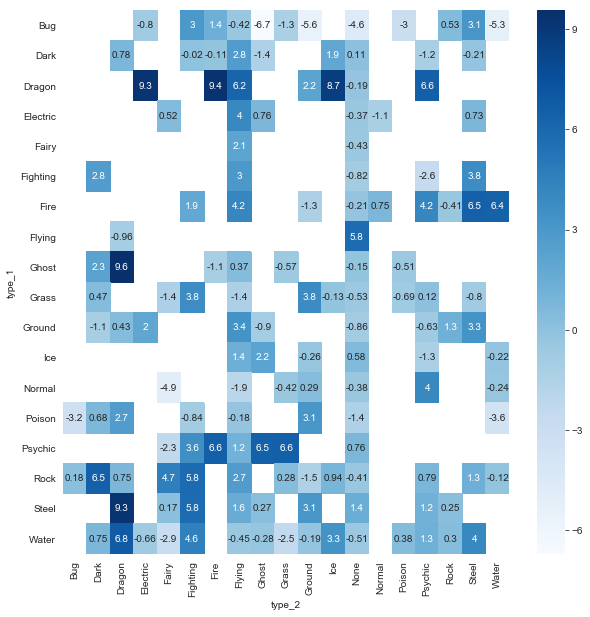

In [71]:
# heat map for strongest metric 
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(z_all,annot=True,ax=ax,cbar = True,cmap="Blues")

**Observation:** 
1. The strongest pokemon combination is Dragon & Ghost with score of 9.6.

The other top highest pokemon combination is: 
2. Fire & Dragon combination with score of 9.4. 
3. Electric & Dragon combination with score of 9.3. 
4. Dragon & Steel combination with score of 9.3. 
    


**Looks like the strongest pokemons are of dragon type as they all appared in the heat map having the hgihest scores. The interesting thing fact is that all dragon types in the primary species were not the most common ones amonge the list, they are few and rear but the strongests.** 


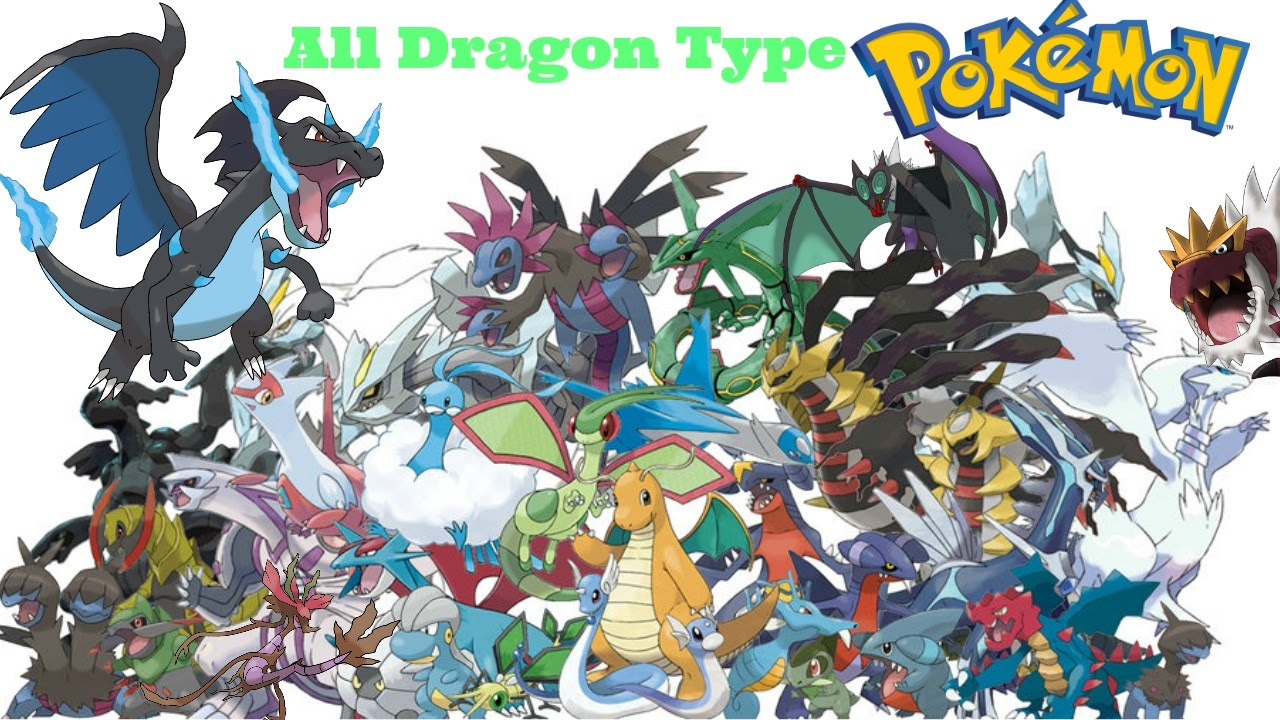

### Do any types of Pokemon excel at certain statistics over others?

### 1. HP Metric:

From the HP heat map,it can be seen that the dragon & ghost combination has the highest score of 3.2. The second highest HP abilty is ice & dragon combination. Dragons still the strongest here.

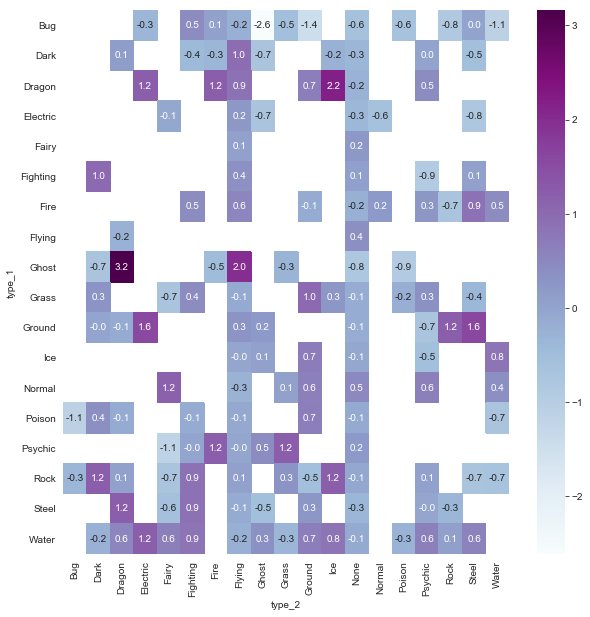

In [72]:
# heat map for hp metric only 
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(z_hp,annot=True,fmt =".1f", ax=ax,cmap="BuPu",cbar = True);

### 2. Attack Metrick: 

From the Attack heat map,it can be seen that the dragon & electric combination has the highest score of 2.6. The second highest attack abilty is dark & rock combination. Dragons still the strongest here too.

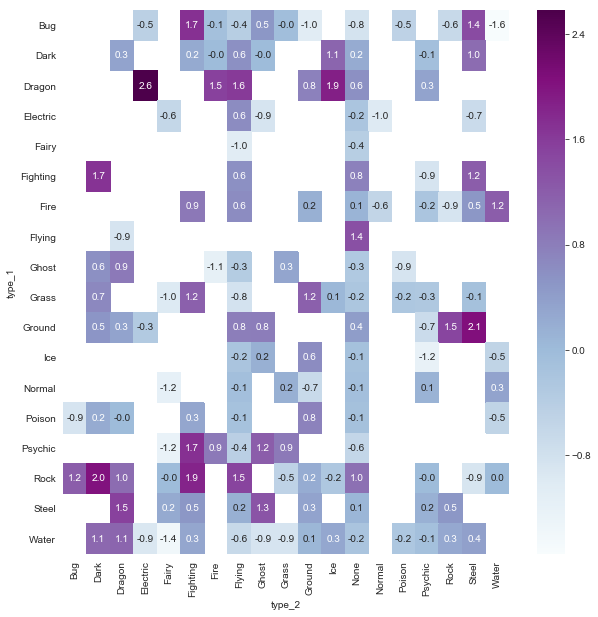

In [73]:
# heat map for attck metric only 
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(z_attack, annot=True,ax =ax,fmt=".1f", cmap = "BuPu",cbar = True);

### 3. Defense Metric: 

From the Defense heat map,it can be seen that the ground & steel combination has the highest score of 4.4. 

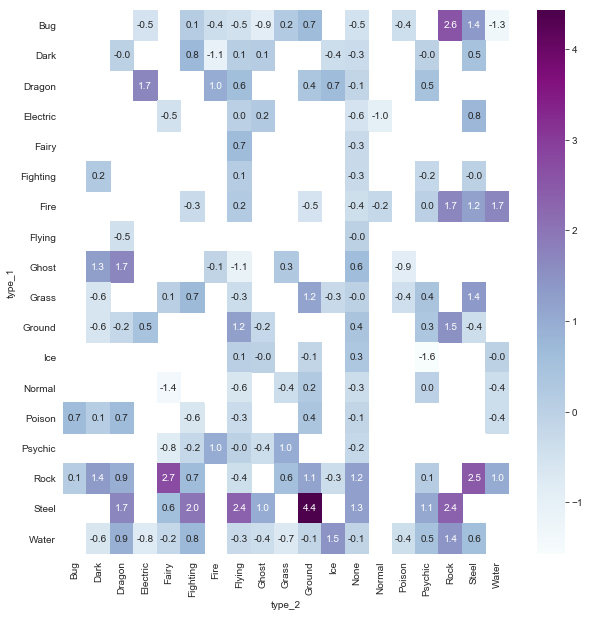

In [74]:
# heat map for defense metric only 
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(z_defense, annot=True, fmt=".1f", ax =ax, cmap = "BuPu", cbar = True);

### 4. Sp. Atk Metric: 

From the Sp. Atk heat map,it can be seen that the (dragon & Fire) and (dragon & fire) combinations have the highest score of 2.8. Dragons still the strongest here.

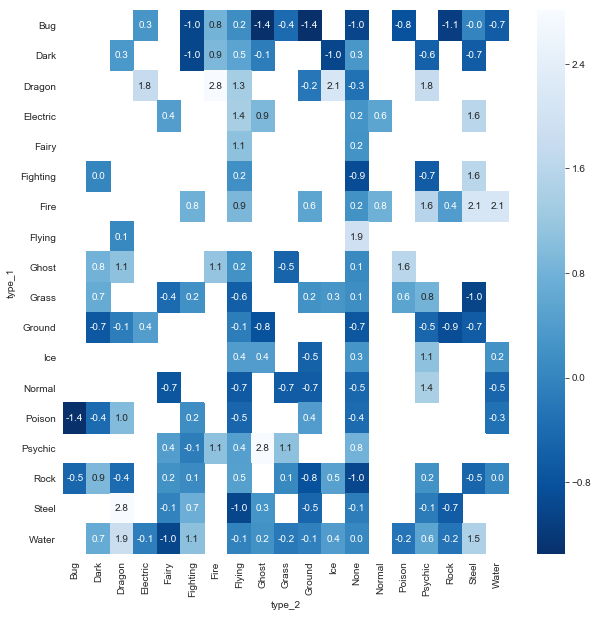

In [75]:
# heat map for sp. atk metric only 
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(z_spatk, annot=True, fmt=".1f", cmap = 'Blues_r', cbar = True);

### 5. Sp. Def Metric: 

From the Sp. Def heat map,it can be seen that the fair & rock combination has the highest score of 3.

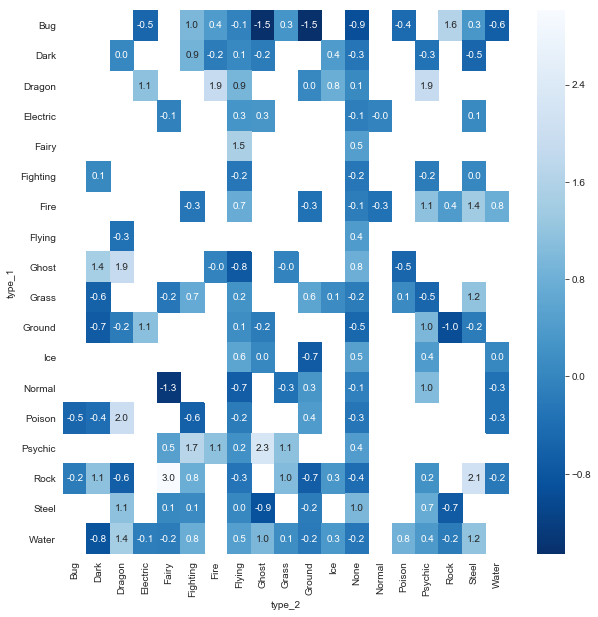

In [76]:
# heat map for sp. def metric only 
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(z_spdef, annot=True, fmt=".1f", cmap = 'Blues_r', cbar = True);

### 6. Speed Metric: 

From the Speed heat map,it can be seen that the ice & dark combination has the highest score of 2.

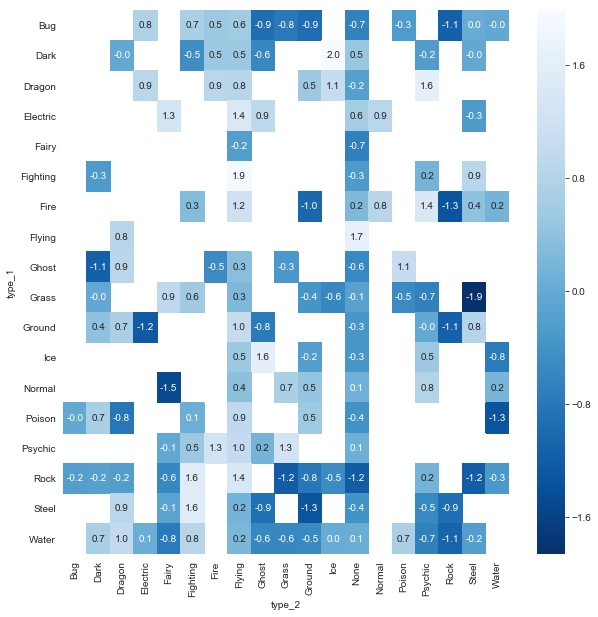

In [77]:
# heat map for speed metric only 
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(z_spd, annot=True, fmt=".1f", cmap = 'Blues_r', cbar = True);

**Overall Observation:** 

Yes, there some types of pokemon excel at certain statistics depending on the abilities. However, as we found above that dragons are the strongest pokemons, they also appeared in some of metrics as the best from correlation score. On the other hand, there are other type excel in other metrics, this variation could clearly explain which pokemon is the strongest better than looking only at the total in above tables. Heat map with metric allows us to have a clear detailed results that explaines each stats  for each type of pokemon. 

### Are any of the statistics correlated?

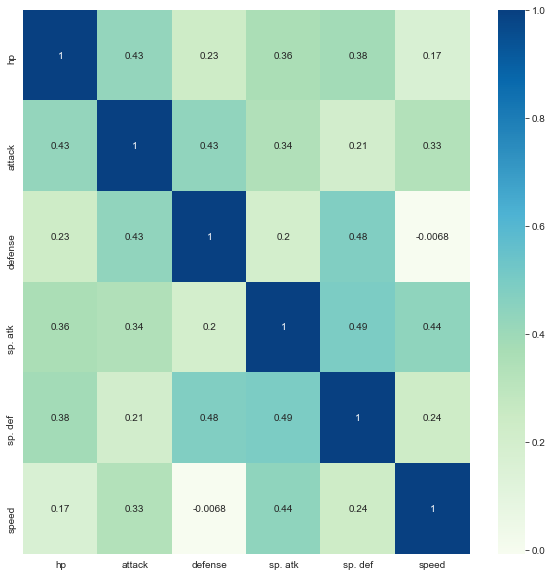

In [78]:
# correlation heat map for all the metrics 
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_summary.corr(), annot=True, ax = ax, cmap='GnBu', cbar=True);

They are corrleation, but not stronge correlation. The highest correlation shown in the above heat map is 0.49 for sp.def and sp.atk. A reltively high correation here is also for sp.def and defense which has a correlation score of 0.48. 